In [2]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts
import run_expts


from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample
import seaborn as sns

from scipy.signal import welch
import yasa
import constants
import numpy as np

/user/home/ko20929/.conda/envs/sktime_latest/lib/python3.11/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [3]:
load_path = '/user/home/ko20929/work/RBD_using_custom_package/Data/freq_6_second_files/'

X = pd.read_hdf(load_path + 'N1six_second_freq_df.h5', key='df', mode='r') 

In [6]:
# Defining a function to replace time series of values with their mean
def function(x):
    return x.values.mean()

#Construct the static features
static_features_df = X.apply(np.vectorize(function))
static_features_df


,Delta_Central,Theta_Central,Alpha_Central,Sigma_Central,Beta_Central,Gamma_Central,TotalAbsPow_Central,Delta_Frontal,Theta_Frontal,Alpha_Frontal,...,Beta_Right Parietal,Gamma_Right Parietal,TotalAbsPow_Right Parietal,Delta_Right Temporal,Theta_Right Temporal,Alpha_Right Temporal,Sigma_Right Temporal,Beta_Right Temporal,Gamma_Right Temporal,TotalAbsPow_Right Temporal
0,0.357054,0.271147,0.143579,0.088512,0.107634,0.032074,37.395927,0.271550,0.316040,0.154706,...,0.099150,0.033403,39.808993,0.315691,0.359739,0.151061,0.066471,0.086552,0.020484,42.908130
1,0.362259,0.269899,0.133596,0.081374,0.111757,0.041116,36.319297,0.284251,0.305415,0.143525,...,0.106362,0.038900,32.773619,0.355393,0.306991,0.147521,0.069479,0.093895,0.026720,29.436151
2,0.406854,0.334486,0.152661,0.049355,0.049246,0.007399,43.074216,0.465542,0.285832,0.137671,...,0.037015,0.009125,26.372808,0.422511,0.326328,0.155640,0.035321,0.044123,0.016078,18.103307
3,0.477266,0.243642,0.151653,0.050000,0.065017,0.012422,37.442328,0.472987,0.258954,0.147300,...,0.049325,0.006712,56.375965,0.456776,0.285298,0.168400,0.041102,0.040351,0.008073,53.663484
4,0.493876,0.275883,0.135107,0.040742,0.047632,0.006758,55.338057,0.485292,0.280343,0.145997,...,0.035193,0.004516,87.594802,0.453780,0.303735,0.160754,0.039141,0.035816,0.006774,62.562579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.435299,0.193446,0.209193,0.070649,0.083038,0.008375,57.827542,0.475867,0.183136,0.185886,...,0.027203,0.005488,80.735880,0.461181,0.219266,0.209252,0.044827,0.052864,0.012610,25.984639
67,0.462307,0.119910,0.095504,0.063631,0.185488,0.073161,31.986673,0.500664,0.102587,0.091624,...,0.127163,0.038677,32.306234,0.455688,0.123333,0.144195,0.082901,0.144856,0.049027,29.052247
68,0.317901,0.094915,0.135905,0.059334,0.308116,0.083829,23.883327,0.296572,0.088342,0.174057,...,0.229213,0.046755,28.593026,0.330349,0.110285,0.199344,0.085303,0.217599,0.057119,20.255110
69,0.521954,0.178997,0.116607,0.089777,0.083018,0.009646,78.386870,0.543619,0.177479,0.118368,...,0.073248,0.010665,65.249642,0.474053,0.198419,0.154021,0.076422,0.082471,0.014614,32.491081


In [45]:
len( (df_example.loc[ind_val].values[0]).values)

55

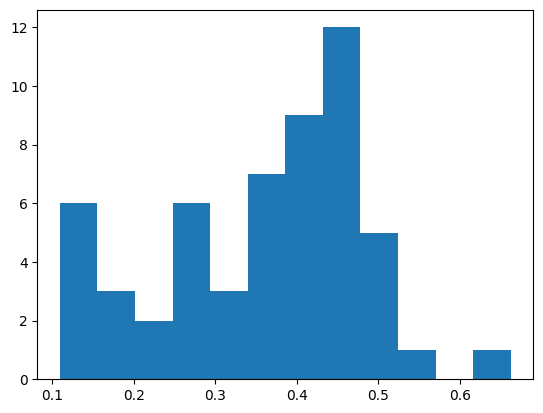

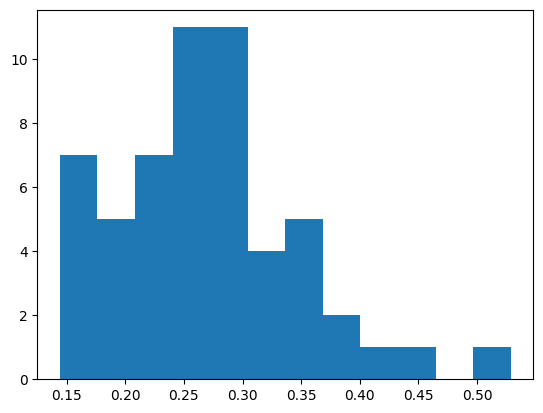

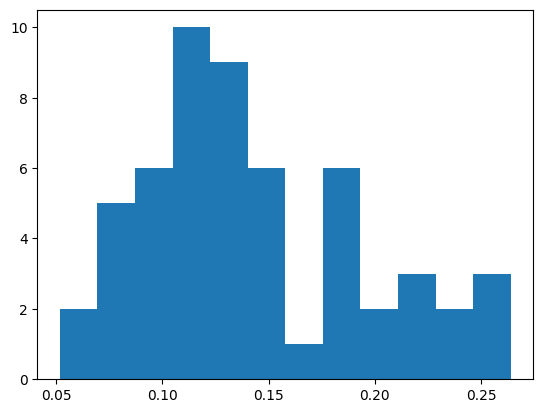

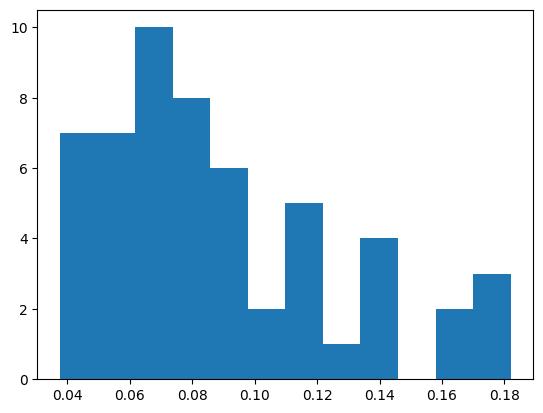

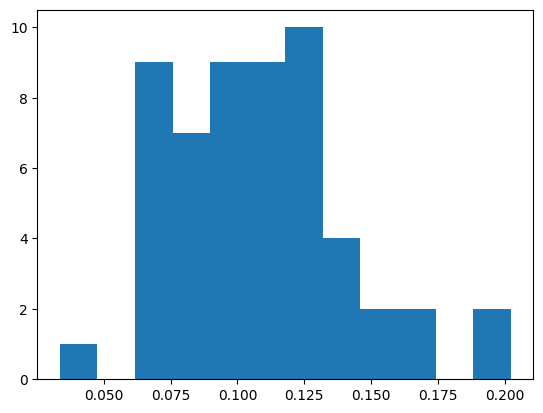

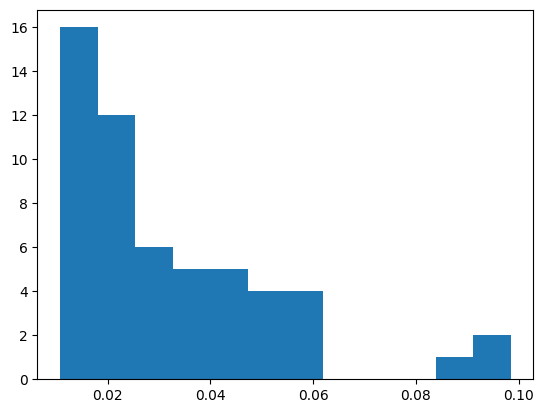

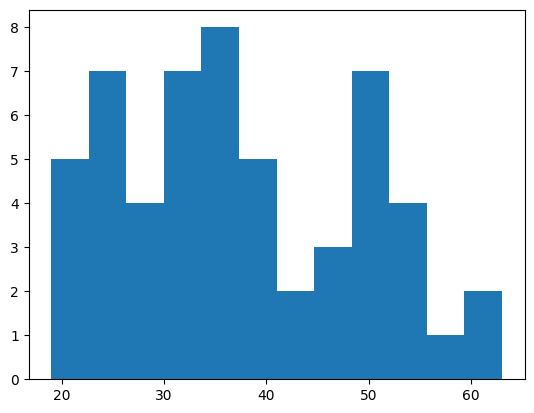

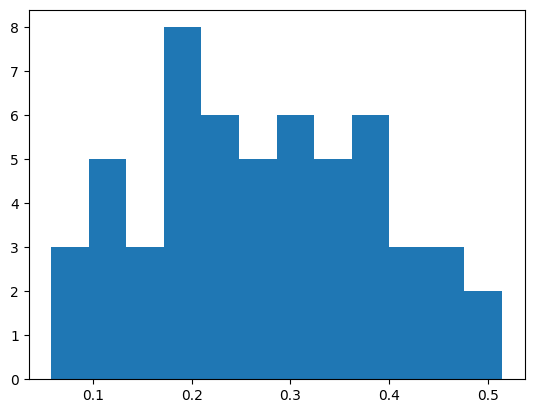

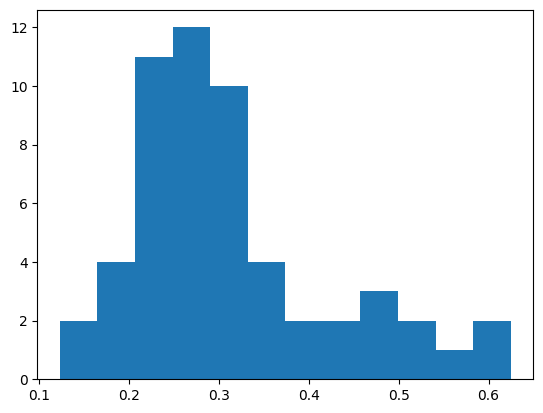

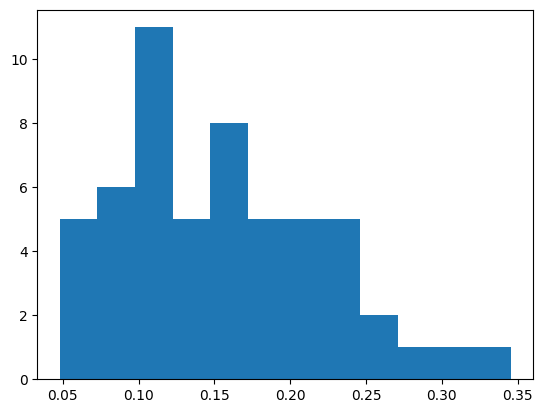

<Figure size 640x480 with 0 Axes>

In [55]:
for ind_val in df_example.index:
    plt.hist( (df_example.loc[ind_val].values[0]).values, bins = 12)
    plt.figure()

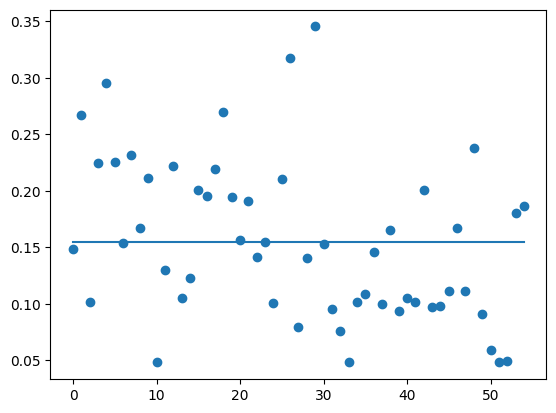

In [47]:
plt.scatter( (df_example.loc[ind_val].values[0]).index.values, (df_example.loc[ind_val].values[0]).values) 
plt.plot( (df_example.loc[ind_val].values[0]).index.values, [(df_example.loc[ind_val].values[0]).values.mean() for i in range(55)]) 


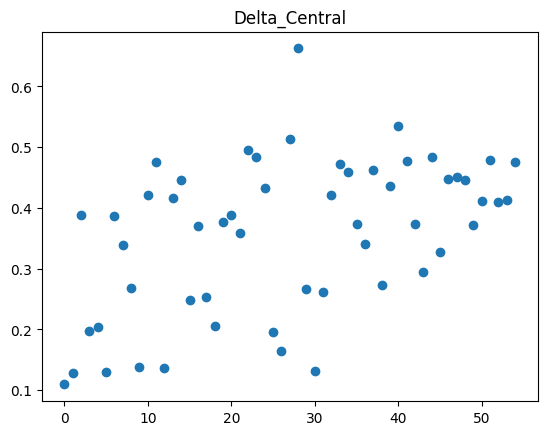

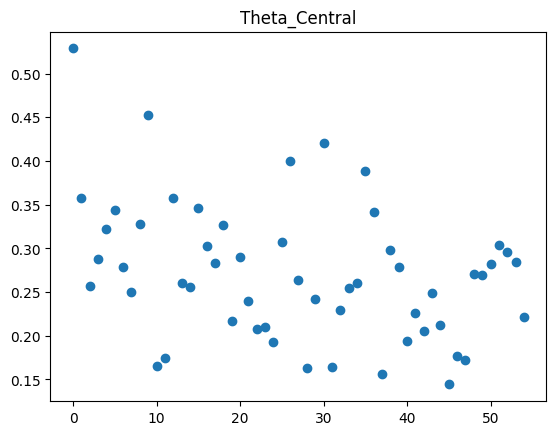

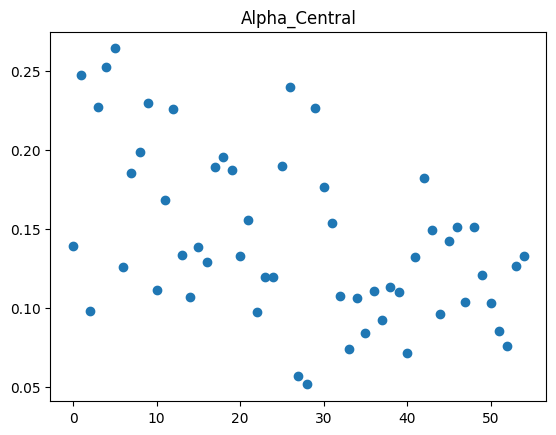

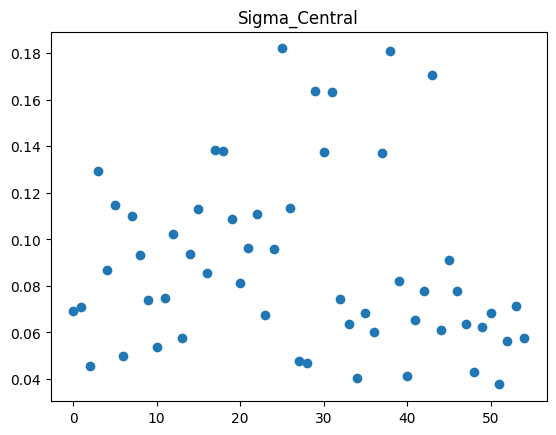

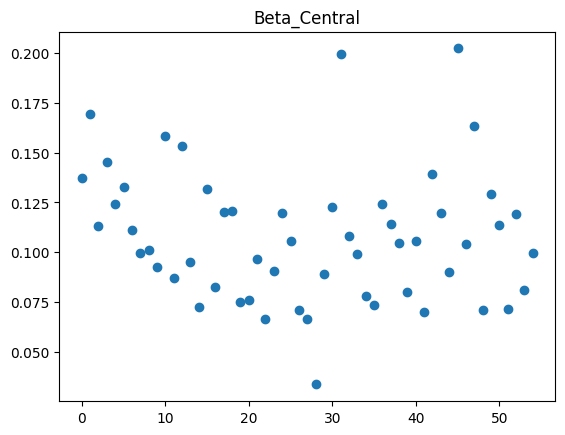

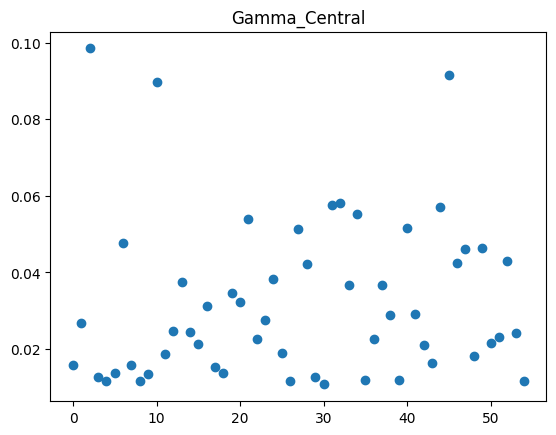

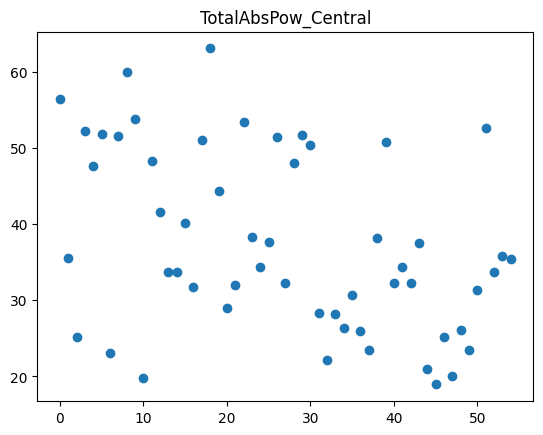

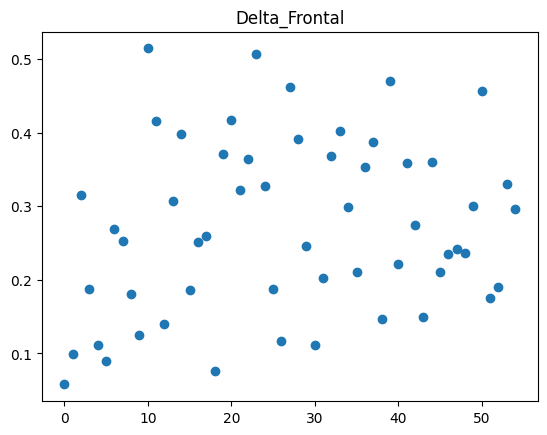

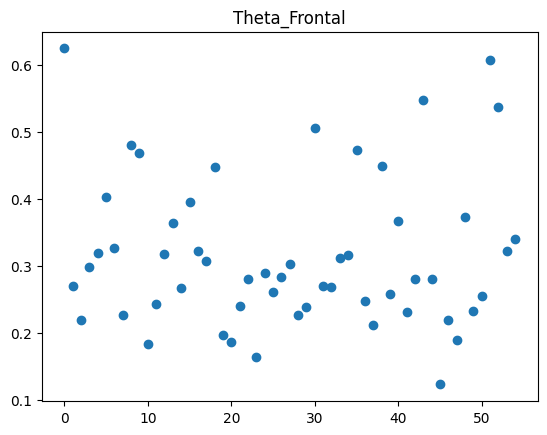

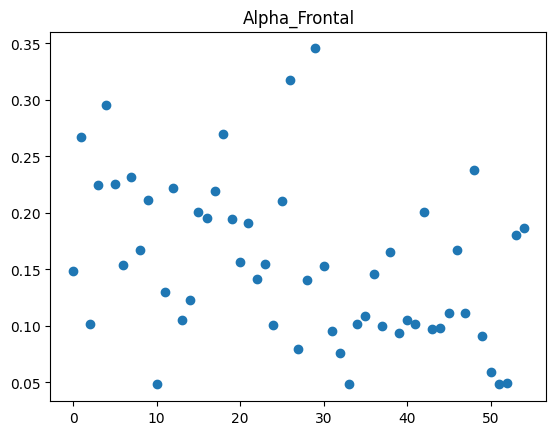

<Figure size 640x480 with 0 Axes>

In [38]:
row_num = 0
df_example = pd.DataFrame(X.iloc[row_num , :10])

for ind_val in df_example.index:
    plt.title(ind_val)
    plt.scatter( (df_example.loc[ind_val].values[0]).index.values, (df_example.loc[ind_val].values[0]).values) 
    plt.figure()

In [5]:
core_path = 'constructed_data/band_power_time_series/expt_dfs/'
folders = {'N1': 'N1_full_expts/' , 'N2' : 'N2_full_expts/','N3' : 'N3_full_expts/', 'REM' :'REM_full_expts/' , 'EC' : 'EC_full_expts/'}

folder = 'N1_full_expts/'

load_path = '/user/home/ko20929/work/RBD_using_custom_package/Data/freq_6_second_files'

X = pd.read_hdf(load_path + 'X.h5', key='df', mode='r')
y = pd.read_hdf(load_path + 'y_full.h5', key='df', mode='r') 
groups = pd.read_hdf(load_path + 'groups.h5', key='df', mode='r')  

# Defining a function to replace time series of values with their mean
def function(x):
    return x.values.mean()

#Construct the static features
static_features_df = X.apply(np.vectorize(function))
X = static_features_df.copy()


FileNotFoundError: File /user/home/ko20929/work/RBD_using_custom_package/Data/freq_6_second_filesX.h5 does not exist